**Classifying MI and CSK with SVM**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

__Step 2:__ Import Data

In [2]:
result = pd.read_csv('CSK vs MI.csv')

In [3]:
result.head() 

,Winner,Score,Balls
0,Mumbai Indians,105,101
1,Mumbai Indians,120,110
2,Mumbai Indians,100,99
3,Mumbai Indians,101,95
4,Mumbai Indians,110,105


__Step 3:__ Prepare the Data

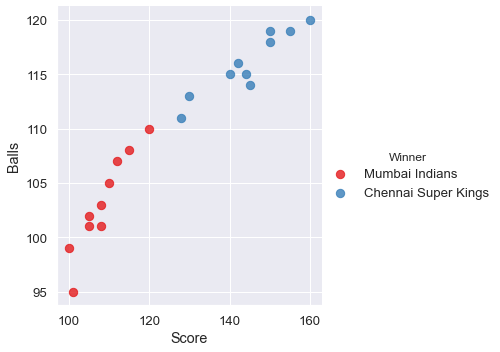

In [4]:
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [5]:
data = result[['Score', 'Balls']]
winner = np.where(result['Winner']=='Mumbai Indians', 0, 1)

__Step 4:__ Fit the Model

In [6]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(data, winner)

SVC(kernel='linear')

__Step 5:__ Visualize Results

In [7]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(100,160)
yy = a * xx - (model.intercept_[0]) / w[1]

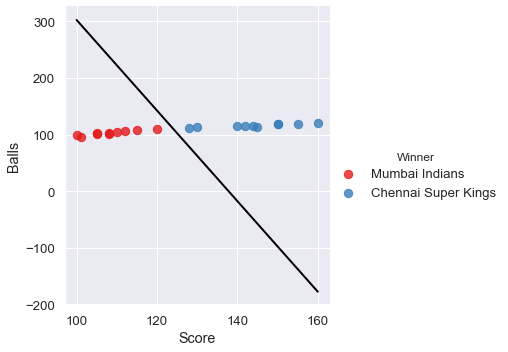

In [9]:
# Plot the hyperplane
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');

In [10]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

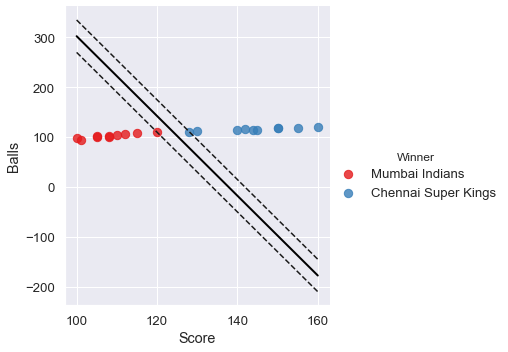

In [12]:
# Look at the margins and support vectors
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [15]:
def MI_or_CSK(Score, Balls):
    if(model.predict([[Score, Balls]]))==0:
        print('For this Situation \'MI\' will win the Match')
    else:
        print('For this Situation \'CSK\' will win the Match')

In [16]:
MI_or_CSK(105,101)

For this Situation 'MI' will win the Match


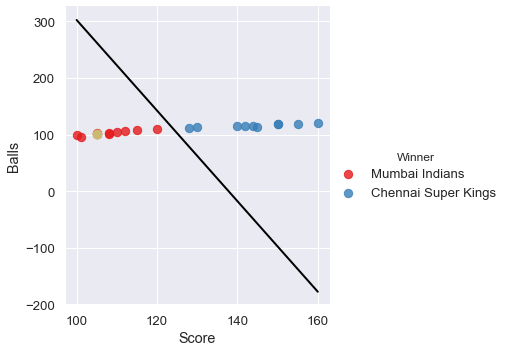

In [18]:
# Plot the point to visually see where the point lies
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(105,101, 'yo', markersize='9');